In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [42]:
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)
X, y = fashion_mnist["data"], fashion_mnist["target"]

In [43]:
# Convert target to numerical format
y = y.astype(np.uint8)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# 3. Perform PCA
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Decision tree

In [46]:
#without pca
scores_without_pca = []
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
scores_without_pca.append(accuracy)
print("Decision tree without pca: " , accuracy)

Decision tree without pca:  0.7932142857142858


In [47]:
# Apply PCA to the dataset
scores_with_pca=[]

# Train the Decision Tree classifier on the PCA-transformed data
model = DecisionTreeClassifier()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

# Calculate and print the accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
scores_with_pca.append(accuracy_pca)
print("Decision Tree with PCA:", accuracy_pca)


Decision Tree with PCA: 0.7488571428571429


Random forest

Without pca

In [48]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
scores_without_pca.append(accuracy)
print("Random forest without pca: " , accuracy)

Random forest without pca:  0.8855714285714286


With pca

In [49]:
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

# Calculate and print the accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
scores_with_pca.append(accuracy_pca)
print("Random forest with PCA:", accuracy_pca)

Random forest with PCA: 0.8507142857142858


SVM

Without PCA

In [50]:
model = SVC()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
scores_without_pca.append(accuracy)
print("SVC without pca: " , accuracy)

SVC without pca:  0.8887857142857143


With PCA

In [51]:
model = SVC()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

# Calculate and print the accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
scores_with_pca.append(accuracy_pca)
print("SVC with PCA:", accuracy_pca)

SVC with PCA: 0.8940714285714285


Comparison

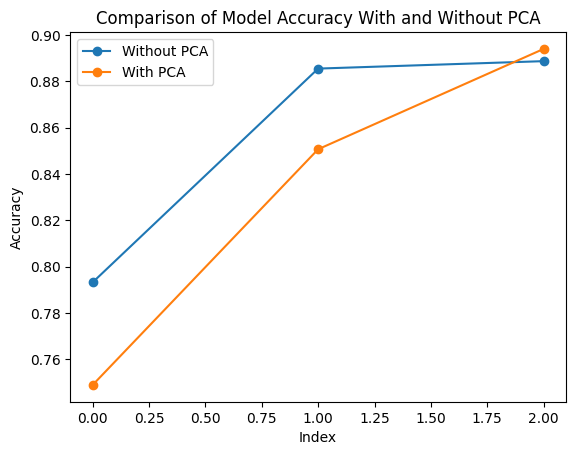

In [52]:
import matplotlib.pyplot as plt

x = range(len(scores_without_pca))

plt.plot(x, scores_without_pca, label='Without PCA', marker='o')
plt.plot(x, scores_with_pca, label='With PCA', marker='o')

plt.title('Comparison of Model Accuracy With and Without PCA')
plt.xlabel('Index')
plt.ylabel('Accuracy')

plt.legend()
plt.show()